#### · 结构化数据分析利器（依赖于numpy）
#### · 提供多种高级数据结构：time-series,dataframe,panel
#### · 强大的数据缩影和处理能力

#### Python预定义了两个数据结构：series和dataframe

## 1. Pandas Series  -> 和numpy里面的array有一点类似

### （1）创建一个pandas series

#### 通过list创建

In [1]:
import numpy as np
import pandas as pd
s1 = pd.Series([1,2,3,4]) #我们可以看到这个Series里面包含两部分内容，第一个是这里面的数据，第二个这是index

In [2]:
s1

0    1
1    2
2    3
3    4
dtype: int64

In [3]:
s1.values  #这样子其实就可以提取series的值

array([1, 2, 3, 4], dtype=int64)

In [4]:
s1.index  #可以看到index的具体内容，这里就是从0开始到4结束，step是1

RangeIndex(start=0, stop=4, step=1)

#### 通过np.arange来创建Series

In [5]:
import numpy as np
import pandas as pd
s2 = pd.Series(np.arange(10))   #注意，在np.arange()里面的参数是可以有两个的，那么就组成几行几列的array，但是Series本身就只会有一条，所以这里面只能传入一个参数
s2   #然后s2就是有10个元素的pandas series

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

#### 通过dictionary来创建Series
series和dictionary的相互转换

dictionary -> series

In [6]:
import numpy as np
import pandas as pd
s3 = pd.Series({'1':1,'2':2,'3':3})
s3

1    1
2    2
3    3
dtype: int64

In [7]:
s3.values  #这个时候，s3的values依旧是一个array

array([1, 2, 3], dtype=int64)

In [8]:
s3.index   #和之前的不一样，这里的index是string，也即字典中的key。

Index(['1', '2', '3'], dtype='object')

创建series时，我们可以指定index

In [9]:
import numpy as np
import pandas as pd
s4 = pd.Series([1,2,3,4], index = ['A','B','C','D'])
s4

A    1
B    2
C    3
D    4
dtype: int64

series -> dictionary

In [10]:
import numpy as np
import pandas as pd
s4 = pd.Series([1,2,3,4], index = ['A','B','C','D'])
s4

A    1
B    2
C    3
D    4
dtype: int64

In [11]:
s4.to_dict()

{'A': 1, 'B': 2, 'C': 3, 'D': 4}

### （2）访问Series里面的元素  -> 这个就很像python的dictionary

#### 访问确定的一个值

In [12]:
import numpy as np
import pandas as pd
s1 = pd.Series([1,2,3,4])
s4 = pd.Series([1,2,3,4], index = ['A','B','C','D'])
s4

A    1
B    2
C    3
D    4
dtype: int64

In [13]:
s4['A']  #相当于我通过index去找value

1

In [15]:
#这里也可以返回两个value
s4[['A','B']]

A    1
B    2
dtype: int64

In [16]:
s1[2]

3

#### 访问一个值范围

In [17]:
import numpy as np
import pandas as pd
s4 = pd.Series([1,2,3,4], index = ['A','B','C','D'])
s4

A    1
B    2
C    3
D    4
dtype: int64

In [18]:
s4[s4>2]

C    3
D    4
dtype: int64

### （3）修改series里面的index（但是不能修改原有的index）

In [19]:
import numpy as np
import pandas as pd
s4 = pd.Series([1,2,3,4], index = ['A','B','C','D'])
s4

A    1
B    2
C    3
D    4
dtype: int64

In [20]:
index_1 = ['A','B','C','D','E']
s5 = pd.Series(s4, index = index_1)  #这样子我就把s4里面的index进行了一个修改
s5

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
dtype: float64

In [22]:
#注意这里有一个问题，如果我们是
f = pd.Series([1,2,3,4], index = ['a','b','c','d'])
print(f)
index_1 = ['A','B','C','D','E']
s3 = pd.Series(s, index = index_1)
print(s3)
#结果就会是都是NaN，这其实就是说明已经存在的对应值是没有办法更改的，比如我将index_1里面的’A’改成a那么结果就会又出现不同

a    1
b    2
c    3
d    4
dtype: int64
A   NaN
B   NaN
C   NaN
D   NaN
E   NaN
dtype: float64


In [23]:
f = pd.Series([1,2,3,4], index = ['a','b','c','d'])
print(f)
index_1 = ['a','B','C','D','E']
s3 = pd.Series(s, index = index_1)
print(s3)
#原本index = a的值仍旧存在，而别的值不存在的还是不存在了

a    1
b    2
c    3
d    4
dtype: int64
a    1.0
B    NaN
C    NaN
D    NaN
E    NaN
dtype: float64


### （4）查看一下数据的NaN情况与否

In [24]:
import numpy as np
import pandas as pd
s4 = pd.Series([1,2,3,4], index = ['A','B','C','D'])
s4

A    1
B    2
C    3
D    4
dtype: int64

In [25]:
index_1 = ['A','B','C','D','E']
s5 = pd.Series(s4, index = index_1) 
s5

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
dtype: float64

In [26]:
pd.isnull(s5)  #如果是有数的那么就是False，如果是NaN就是True。另外这里仍旧可以带入之前np内容的sum，print(sum(pd.isnull(s3)))返回值就是4

A    False
B    False
C    False
D    False
E     True
dtype: bool

In [27]:
pd.notnull(s5)  #如果是有数的那么就是True，如果是NaN就是False

A     True
B     True
C     True
D     True
E    False
dtype: bool

### （5）给series起名字

In [28]:
import numpy as np
import pandas as pd
s4 = pd.Series([1,2,3,4], index = ['A','B','C','D'])
s4

A    1
B    2
C    3
D    4
dtype: int64

In [29]:
index_1 = ['A','B','C','D','E']
s5 = pd.Series(s4, index = index_1)
s5.index.name = 'demo index'
s5  #然后就可以看到在s5的最开始index的位置上方有一个demo index这就是s5的名字

demo index
A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
dtype: float64

## 2. Pandas DataFrame

### （1）如何在pandas里面创建dataframe

In [31]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#通过粘贴板去创建一个dataframe
import webbrowser
link = 'https://www.tiobe.com/tiobe-index/'
webbrowser.open(link)  #这样子打开网页
#然后我选取前十数据，点击复制

True

In [33]:
df = pd.read_clipboard()
df  #这样子就可以将我们复制的内容通过这种粘贴板的形式生成了一个dataframe

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.896%,-0.01%
1,2,2,NaN,C,15.773%,+2.44%
2,3,3,NaN,Python,9.704%,+1.41%
3,4,4,NaN,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,NaN,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


### （2）对dataframe能够进行的简单操作

#### 获取columns name

In [35]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_clipboard()
df

,Jan,2020,Jan.1,2019,Change,Programming,Language,Ratings,Change.1
0,0,1,1,NaN,Java,16.896%,-0.01%,None,None
1,1,2,2,NaN,C,15.773%,+2.44%,None,None
2,2,3,3,NaN,Python,9.704%,+1.41%,None,None
3,3,4,4,NaN,C++,5.574%,-2.58%,None,None
4,4,5,7,change,C#,5.349%,+2.07%,None,None
5,5,6,5,change,Visual,Basic,.NET,5.287%,-1.17%
6,6,7,6,change,JavaScript,2.451%,-0.85%,None,None
7,7,8,8,NaN,PHP,2.405%,-0.28%,None,None
8,8,9,15,change,Swift,1.795%,+0.61%,None,None
9,9,10,9,change,SQL,1.504%,-0.77%,None,None


In [36]:
df.columns

Index(['Jan', '2020', 'Jan.1', '2019', 'Change', 'Programming', 'Language',
       'Ratings', 'Change.1'],
      dtype='object')

#### 获取某些列的value
获取某些列的value,返回的数据类型就是series

In [40]:
#获取单列的value
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_clipboard()
df

,Jan,2020,Jan.1,2019,Change,Programming,Language,Ratings,Change.1
0,1,1,Java,16.896%,-0.01%,None,None,None,NaN
1,2,2,C,15.773%,+2.44%,None,None,None,NaN
2,3,3,Python,9.704%,+1.41%,None,None,None,NaN
3,4,4,C++,5.574%,-2.58%,None,None,None,NaN
4,5,7,change,C#,5.349%,+2.07%,None,None,NaN
5,6,5,change,Visual,Basic,.NET,5.287%,-1.17%,NaN
6,7,6,change,JavaScript,2.451%,-0.85%,None,None,NaN
7,8,8,PHP,2.405%,-0.28%,None,None,None,NaN
8,9,15,change,Swift,1.795%,+0.61%,None,None,NaN
9,10,9,change,SQL,1.504%,-0.77%,None,None,NaN


In [41]:
df.Ratings

0      None
1      None
2      None
3      None
4      None
5    -1.17%
6      None
7      None
8      None
9      None
Name: Ratings, dtype: object

In [44]:
df[['Ratings']]  #如果采用[[]]的形式，那么输出的表格其实才会有原本的列名

,Ratings
0,None
1,None
2,None
3,None
4,None
5,-1.17%
6,None
7,None
8,None
9,None


In [43]:
df['2019']

0       16.896%
1       15.773%
2        9.704%
3        5.574%
4            C#
5        Visual
6    JavaScript
7        2.405%
8         Swift
9           SQL
Name: 2019, dtype: object

In [45]:
#有些时候我们虽然有这么多数据，但是我们可能只需要关注某几列的值，那么我们可以用columns进行过滤，然后生成一个新的dataframe
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_clipboard()
#print(df)
df_new = DataFrame(df, columns = ['Jan 2019','Programming Language'])  #这里抽取列的方式，和我一般用的df_new = df[['Programming Language','Ratings','sep 2018']]这样的方式不同，两者区别在于，我一般用的方式如果里面存在不存在的列，那么是不能被抽取的，但是如果用了DataFrame那么其实没有这一列，也会创造出这一列出来
df_new

,Jan 2019,Programming Language
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


#### 不存在的列

In [46]:
#如果我们想要过滤的列并不在原有的列以内那么会出现什么情况？
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_clipboard()
df

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.896%,-0.01%
1,2,2,NaN,C,15.773%,+2.44%
2,3,3,NaN,Python,9.704%,+1.41%
3,4,4,NaN,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,NaN,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


In [48]:
df_new = DataFrame(df, columns = ['Jan 2019','Programming Language','Sep 2018'])  # Sep 2018在原始的dataframe里面并不存在
df_new  #会出现不存在的columns，但是所有的value都是none

,Jan 2019,Programming Language,Sep 2018
0,1,Java,NaN
1,2,C,NaN
2,3,Python,NaN
3,4,C++,NaN
4,7,C#,NaN
5,5,Visual Basic .NET,NaN
6,6,JavaScript,NaN
7,8,PHP,NaN
8,15,Swift,NaN
9,9,SQL,NaN


#### 给新的column赋值？

In [49]:
#通过类似于python字典的方式去赋值
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_clipboard()
df

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.896%,-0.01%
1,2,2,NaN,C,15.773%,+2.44%
2,3,3,NaN,Python,9.704%,+1.41%
3,4,4,NaN,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,NaN,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


In [50]:
df_new = DataFrame(df, columns = ['Jan 2019','Programming Language','Sep 2018'])
df_new

,Jan 2019,Programming Language,Sep 2018
0,1,Java,NaN
1,2,C,NaN
2,3,Python,NaN
3,4,C++,NaN
4,7,C#,NaN
5,5,Visual Basic .NET,NaN
6,6,JavaScript,NaN
7,8,PHP,NaN
8,15,Swift,NaN
9,9,SQL,NaN


In [51]:
df_new['Sep 2018'] = range(0,10)
df_new

,Jan 2019,Programming Language,Sep 2018
0,1,Java,0
1,2,C,1
2,3,Python,2
3,4,C++,3
4,7,C#,4
5,5,Visual Basic .NET,5
6,6,JavaScript,6
7,8,PHP,7
8,15,Swift,8
9,9,SQL,9


In [52]:
#可以通过numpy的array去赋值
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_clipboard()
df

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.896%,-0.01%
1,2,2,NaN,C,15.773%,+2.44%
2,3,3,NaN,Python,9.704%,+1.41%
3,4,4,NaN,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,NaN,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


In [53]:
df_new = DataFrame(df, columns = ['Jan 2019','Programming Language','Sep 2018'])
df_new

,Jan 2019,Programming Language,Sep 2018
0,1,Java,NaN
1,2,C,NaN
2,3,Python,NaN
3,4,C++,NaN
4,7,C#,NaN
5,5,Visual Basic .NET,NaN
6,6,JavaScript,NaN
7,8,PHP,NaN
8,15,Swift,NaN
9,9,SQL,NaN


In [54]:
df_new['Sep 2018'] = np.arange(0,10)
df_new

,Jan 2019,Programming Language,Sep 2018
0,1,Java,0
1,2,C,1
2,3,Python,2
3,4,C++,3
4,7,C#,4
5,5,Visual Basic .NET,5
6,6,JavaScript,6
7,8,PHP,7
8,15,Swift,8
9,9,SQL,9


In [55]:
#还可以通过Series赋值，因为之前我们说了这里面的值得数据类型是series
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_clipboard()
df

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.896%,-0.01%
1,2,2,NaN,C,15.773%,+2.44%
2,3,3,NaN,Python,9.704%,+1.41%
3,4,4,NaN,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,NaN,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


In [57]:
df_new = DataFrame(df, columns = ['Jan 2019','Programming Language','Sep 2018'])
df_new

,Jan 2019,Programming Language,Sep 2018
0,1,Java,NaN
1,2,C,NaN
2,3,Python,NaN
3,4,C++,NaN
4,7,C#,NaN
5,5,Visual Basic .NET,NaN
6,6,JavaScript,NaN
7,8,PHP,NaN
8,15,Swift,NaN
9,9,SQL,NaN


In [58]:
df_new['Sep 2018'] = pd.Series(np.arange(0,10))
df_new

,Jan 2019,Programming Language,Sep 2018
0,1,Java,0
1,2,C,1
2,3,Python,2
3,4,C++,3
4,7,C#,4
5,5,Visual Basic .NET,5
6,6,JavaScript,6
7,8,PHP,7
8,15,Swift,8
9,9,SQL,9


#### 修改dataframe中某几个value
但是我如果不是要给所有的值赋值，而是要修改其中的某几个值，如何办？

我们可以通过series去指定index

In [59]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_clipboard()
df

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.896%,-0.01%
1,2,2,NaN,C,15.773%,+2.44%
2,3,3,NaN,Python,9.704%,+1.41%
3,4,4,NaN,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,NaN,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


In [60]:
df_new = DataFrame(df, columns = ['Jan 2019','Programming Language','Sep 2018'])
df_new

,Jan 2019,Programming Language,Sep 2018
0,1,Java,NaN
1,2,C,NaN
2,3,Python,NaN
3,4,C++,NaN
4,7,C#,NaN
5,5,Visual Basic .NET,NaN
6,6,JavaScript,NaN
7,8,PHP,NaN
8,15,Swift,NaN
9,9,SQL,NaN


In [61]:
df_new['Sep 2018'] = pd.Series([100,200], index = [1,2])  #这样子就修改了Sep 2018的第2和第3行的值，分别修改为100和200
df_new

,Jan 2019,Programming Language,Sep 2018
0,1,Java,NaN
1,2,C,100.0
2,3,Python,200.0
3,4,C++,NaN
4,7,C#,NaN
5,5,Visual Basic .NET,NaN
6,6,JavaScript,NaN
7,8,PHP,NaN
8,15,Swift,NaN
9,9,SQL,NaN


## 3. 深入理解Series和Dataframe
Dataframe和series的关系。

Series其实是一维的数据结构，但是dataframe是可以说是二维的，因为他是由多个series组成的
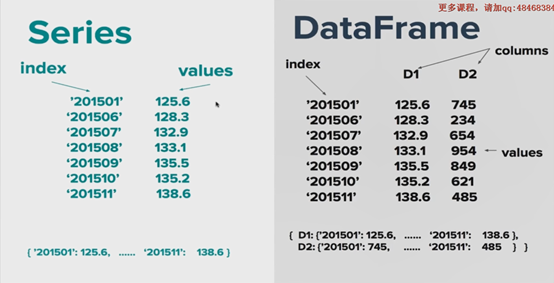

In [62]:
#准备的数据
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
data = {'Country':['Belgium','India','Brazil'],'Capital':['Brussels','New Delhi','Brasilia'],'Population':[11190846,130317103,207847528]}

### （1）Series

In [63]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
data = {'Country':['Belgium','India','Brazil'],'Capital':['Brussels','New Delhi','Brasilia'],'Population':[11190846,130317103,207847528]}

s1 = pd.Series(data['Country'])  #上面字典里面每一个key对应的value其实是一组list，那么即可以将其抽出来以series显示
s1

0    Belgium
1      India
2     Brazil
dtype: object

In [64]:
s1 = pd.Series(data)  #如果我们不指明是要字典中的哪个key, 那么其实value就是每个list而index则是每个key
s1

Country               [Belgium, India, Brazil]
Capital        [Brussels, New Delhi, Brasilia]
Population    [11190846, 130317103, 207847528]
dtype: object

对series来讲，由两部分组成：

①values -> array类型

②index  -> 可以修改


In [65]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
data = {'Country':['Belgium','India','Brazil'],'Capital':['Brussels','New Delhi','Brasilia'],'Population':[11190846,130317103,207847528]}

s1 = pd.Series(data['Country'], index = ['a','b','c']) 
s1

a    Belgium
b      India
c     Brazil
dtype: object

### （2）DataFrame

#### 形成dataframe

In [66]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
data = {'Country':['Belgium','India','Brazil'],'Capital':['Brussels','New Delhi','Brasilia'],'Population':[11190846,130317103,207847528]}

df1 = pd.DataFrame(data)  #只有dataframe才可以按照我们想象的，将字典中的key当做列名，字典里面的value当做每列值这样排列下来
df1

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,130317103
2,Brazil,Brasilia,207847528


#### 访问某一列

In [67]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
data = {'Country':['Belgium','India','Brazil'],'Capital':['Brussels','New Delhi','Brasilia'],'Population':[11190846,130317103,207847528]}

df1 = pd.DataFrame(data)
cou = df1['Country']
cou

0    Belgium
1      India
2     Brazil
Name: Country, dtype: object

In [68]:
#接着我们想看看这个country这一列是什么数据类型
print(type(cou))      #<class 'pandas.core.series.Series'>  ->  即series数据类型
#其实对于一个dataframe有很多columns，然后每一个columns其实就是一个series。所以dataframe可以看成是由几个series组成的

<class 'pandas.core.series.Series'>


#### 访问某一行df.loc[:,:]

In [69]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
data = {'Country':['Belgium','India','Brazil'],'Capital':['Brussels','New Delhi','Brasilia'],'Population':[11190846,130317103,207847528]}

df1 = pd.DataFrame(data)
df1.iterrows()
# <generator object DataFrame.iterrows at 0x10ED4630>  

<generator object DataFrame.iterrows at 0x0000026E3F7EC048>

In [70]:
#在python中如果显示的是generator，那么就可以通过for循环去取数据
for row in df1.iterrows():
    print(type(row[0]),type(row[1]))
    break  #我在这就打印第一行的情况其实可以看出每一行除了最开始的index以外，其实也是series


<class 'int'> <class 'pandas.core.series.Series'>


### （3）Series和DataFrame之间的相互转换
通过上面分析我们可以看出其实dataframe行列都是由series组成的，那么肯定可以通过series去创建dataframe

In [71]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
data = {'Country':['Belgium','India','Brazil'],'Capital':['Brussels','New Delhi','Brasilia'],'Population':[11190846,130317103,207847528]}

s1 = pd.Series(data['Country'])
s2 = pd.Series(data['Capital'])
s3 = pd.Series(data['Population'])
df_new = pd.DataFrame([s1,s2,s3], index = ['Country','Capital','Population'])
df_new

,0,1,2
Country,Belgium,India,Brazil
Capital,Brussels,New Delhi,Brasilia
Population,11190846,130317103,207847528


In [72]:
df1  #我们发现用series来形成的dataframe和原始的dataframe还是有所差别，是有所颠倒的

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,130317103
2,Brazil,Brasilia,207847528


In [73]:
#我们可以将其转过来
df_new = df_new.T  #.T就是将原先内容颠倒的操作
df_new

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,130317103
2,Brazil,Brasilia,207847528


## 4. Pandas-Dataframe-IO操作
IO操作无非就是IO的读取和写入

In [74]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#IO操作的内容：http://pandas.pydata.org/pandas-docs/version/0.20/io.html
#我们之前已经讲了clipboard了
df1 = pd.read_clipboard()
df1

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.896%,-0.01%
1,2,2,NaN,C,15.773%,+2.44%
2,3,3,NaN,Python,9.704%,+1.41%
3,4,4,NaN,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,NaN,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


### （1）csv文件的读写操作

#### csv的写入操作

In [75]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = pd.read_clipboard()
df1.to_csv('df1.csv')  #然后我们就可以看到一个csv文件创立起来了。
#但是我们发现这个创立的csv文件有index，如果我们不想有index
df1.to_csv('df2.csv',index = False)

#### csv的读取

In [78]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df2 = pd.read_csv('df2.csv')
df2

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.896%,-0.01%
1,2,2,NaN,C,15.773%,+2.44%
2,3,3,NaN,Python,9.704%,+1.41%
3,4,4,NaN,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,NaN,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


### （2）dataframe和json之间也是可以相互转换的

In [79]:
df3 = df2.to_json()
df3

'{"Jan 2020":{"0":1,"1":2,"2":3,"3":4,"4":5,"5":6,"6":7,"7":8,"8":9,"9":10},"Jan 2019":{"0":1,"1":2,"2":3,"3":4,"4":7,"5":5,"6":6,"7":8,"8":15,"9":9},"Change":{"0":null,"1":null,"2":null,"3":null,"4":"change","5":"change","6":"change","7":null,"8":"change","9":"change"},"Programming Language":{"0":"Java","1":"C","2":"Python","3":"C++","4":"C#","5":"Visual Basic .NET","6":"JavaScript","7":"PHP","8":"Swift","9":"SQL"},"Ratings":{"0":"16.896%","1":"15.773%","2":"9.704%","3":"5.574%","4":"5.349%","5":"5.287%","6":"2.451%","7":"2.405%","8":"1.795%","9":"1.504%"},"Change.1":{"0":"-0.01%","1":"+2.44%","2":"+1.41%","3":"-2.58%","4":"+2.07%","5":"-1.17%","6":"-0.85%","7":"-0.28%","8":"+0.61%","9":"-0.77%"}}'

In [80]:
#然后我json也可以反过来转换成dataframe
df4 = pd.read_json(df3)
df4

,Jan 2020,Jan 2019,Change,Programming Language,Ratings,Change.1
0,1,1,None,Java,16.896%,-0.01%
1,2,2,None,C,15.773%,+2.44%
2,3,3,None,Python,9.704%,+1.41%
3,4,4,None,C++,5.574%,-2.58%
4,5,7,change,C#,5.349%,+2.07%
5,6,5,change,Visual Basic .NET,5.287%,-1.17%
6,7,6,change,JavaScript,2.451%,-0.85%
7,8,8,None,PHP,2.405%,-0.28%
8,9,15,change,Swift,1.795%,+0.61%
9,10,9,change,SQL,1.504%,-0.77%


### （3）dataframe写入到excel文件

In [81]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df2 = pd.read_csv('df2.csv')
df2.to_excel('df2.xlsx')

## 5. DataFrame的Selecting和indexing

### （1）读取movie的csv

In [82]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
imdb = pd.read_csv('movie_metadata.csv')
imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### （2）查看属性

In [83]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
imdb = pd.read_csv('movie_metadata.csv')
imdb.shape  #(5043, 28)结果发现有这么多行，我们不可能每一次都让这么多内容在屏幕上显示

(5043, 28)

In [84]:
imdb.head()  #默认返回前五行

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [85]:
imdb.head(10)  #因为我加了一个10，所以就返回前十行

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [86]:
imdb.tail()  #默认返回后五行

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


### （3）直接返回某一列

In [87]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
imdb = pd.read_csv('movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [89]:
imdb[['color']]  #返回color那一列,如果我直接用imdb['color']) 是没有标题的

,color
0,Color
1,Color
2,Color
3,Color
4,NaN
...,...
5038,Color
5039,Color
5040,Color
5041,Color


In [90]:
#既然返回的是series（上一讲讲过），那么我们就可以返回具体某一个value
imdb['color'][0]

'Color'

### （4）我们想要了解某几列

In [91]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
imdb = pd.read_csv('movie_metadata.csv')
imdb[['color','director_name']]  #这样子就获取我们想要的列数

,color,director_name
0,Color,James Cameron
1,Color,Gore Verbinski
2,Color,Sam Mendes
3,Color,Christopher Nolan
4,NaN,Doug Walker
...,...,...
5038,Color,Scott Smith
5039,Color,NaN
5040,Color,Benjamin Roberds
5041,Color,Daniel Hsia


### （5）有具体的column，又想获取某几行

In [92]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
imdb = pd.read_csv('movie_metadata.csv')
#我们先创建一个新的dataframe
sub_df = imdb[['director_name','movie_title','imdb_score']]
sub_df

,director_name,movie_title,imdb_score
0,James Cameron,Avatar,7.9
1,Gore Verbinski,Pirates of the Caribbean: At World's End,7.1
2,Sam Mendes,Spectre,6.8
3,Christopher Nolan,The Dark Knight Rises,8.5
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,7.1
...,...,...,...
5038,Scott Smith,Signed Sealed Delivered,7.7
5039,NaN,The Following,7.5
5040,Benjamin Roberds,A Plague So Pleasant,6.3
5041,Daniel Hsia,Shanghai Calling,6.3


In [93]:
sub_df.head()   #看前五行

,director_name,movie_title,imdb_score
0,James Cameron,Avatar,7.9
1,Gore Verbinski,Pirates of the Caribbean: At World's End,7.1
2,Sam Mendes,Spectre,6.8
3,Christopher Nolan,The Dark Knight Rises,8.5
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,7.1


In [94]:
#但如果我们想要看第10行到第15行
sub_df.iloc[10:20,:]  #iloc[]则是通过切片来定位，是基于位置信息的，而和columns name是没有关系的。逗号前面是对行的切片，逗号后面是对列的切片

,director_name,movie_title,imdb_score
10,Zack Snyder,Batman v Superman: Dawn of Justice,6.9
11,Bryan Singer,Superman Returns,6.1
12,Marc Forster,Quantum of Solace,6.7
13,Gore Verbinski,Pirates of the Caribbean: Dead Man's Chest,7.3
14,Gore Verbinski,The Lone Ranger,6.5
15,Zack Snyder,Man of Steel,7.2
16,Andrew Adamson,The Chronicles of Narnia: Prince Caspian,6.6
17,Joss Whedon,The Avengers,8.1
18,Rob Marshall,Pirates of the Caribbean: On Stranger Tides,6.7
19,Barry Sonnenfeld,Men in Black 3,6.8


In [95]:
#iloc也是可以过滤列，但是列过滤并不是通过total name，它其实是有一个隐形的列
#director_name就是第一列，对应位置是0
sub_df.iloc[10:20,0:2]

,director_name,movie_title
10,Zack Snyder,Batman v Superman: Dawn of Justice
11,Bryan Singer,Superman Returns
12,Marc Forster,Quantum of Solace
13,Gore Verbinski,Pirates of the Caribbean: Dead Man's Chest
14,Gore Verbinski,The Lone Ranger
15,Zack Snyder,Man of Steel
16,Andrew Adamson,The Chronicles of Narnia: Prince Caspian
17,Joss Whedon,The Avengers
18,Rob Marshall,Pirates of the Caribbean: On Stranger Tides
19,Barry Sonnenfeld,Men in Black 3


In [96]:
#iloc[]则是通过切片来定位，是基于位置信息的，而和columns name是没有关系的。
tmp_sub_df = sub_df.iloc[10:20,0:2]
tmp_sub_df

,director_name,movie_title
10,Zack Snyder,Batman v Superman: Dawn of Justice
11,Bryan Singer,Superman Returns
12,Marc Forster,Quantum of Solace
13,Gore Verbinski,Pirates of the Caribbean: Dead Man's Chest
14,Gore Verbinski,The Lone Ranger
15,Zack Snyder,Man of Steel
16,Andrew Adamson,The Chronicles of Narnia: Prince Caspian
17,Joss Whedon,The Avengers
18,Rob Marshall,Pirates of the Caribbean: On Stranger Tides
19,Barry Sonnenfeld,Men in Black 3


In [97]:
tmp_sub_df.iloc[2:3,0:1]  #过滤出来tmp_sub_df里面的第二行第一个值，所以这就证明是按照位置信息来过滤，而不是通过label来过滤

,director_name
12,Marc Forster


In [98]:
#但是有些时候我们还是要通过具体名字过滤
#loc   #loc是通过label name去定位
#比如说tmp 我就想过滤行label为15-17的
tmp_sub_df.loc[15:17,:]  #注意这里的15和17是label而不是index

,director_name,movie_title
15,Zack Snyder,Man of Steel
16,Andrew Adamson,The Chronicles of Narnia: Prince Caspian
17,Joss Whedon,The Avengers


In [99]:
tmp_sub_df.loc[15:17,:'director_name']

,director_name
15,Zack Snyder
16,Andrew Adamson
17,Joss Whedon


## 6. Series和Dataframe的Reindexing

### （1）Series Reindex

In [100]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

s1 = pd.Series([1,2,3,4],index = ['A','B','C','D'])
s1

A    1
B    2
C    3
D    4
dtype: int64

In [101]:
#接着对s1进行reindex
s1 = s1.reindex(index = ['A','B','C','D','E'])
s1  #这个时候其实E对应的value是NaN

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
dtype: float64

对Nan进行赋值

In [102]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#series reindex
s1 = pd.Series([1,2,3,4],index = ['A','B','C','D'])
#print(s1)
#那么我们可以对E的值进行赋值
s1 = s1.reindex(index = ['A','B','C','D','E'],fill_value = 10)  
#注意这里是一步完成的，如果我加上前面对s1进行reindex的部分，那么其实E还是没有赋值
#比如我先reindex的index了，然后再一次进行赋值，其实是赋值不了的
s1

A     1
B     2
C     3
D     4
E    10
dtype: int64

In [104]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#Ffill -> forward fill
s2 = pd.Series(['A','B','C'],index = [1,5,10])
#print(s2)
s2 = s2.reindex(index = range(15), method = 'ffill') #ffill -> forward fill -> 1-5之间的值如果是none，那么就用A赋值，从6-10如果是none那么就填充B，从11-15那么就填充C
s2 #这里之所以会显示这个，我们要知道在s2的基础上进行reindex，那么index为1的时候还是A，index为5的时候还是B，index为10的时候还是C，而1-15的其他空则全部是none，然后等待被填值

0     NaN
1       A
2       A
3       A
4       A
5       B
6       B
7       B
8       B
9       B
10      C
11      C
12      C
13      C
14      C
dtype: object

### （2）dataframe reindex

In [105]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = pd.DataFrame(np.random.rand(25).reshape([5,5]),index = ['A','B','D','E','F'],columns =['c1','c2','c3','c4','c5'] )      #注意一下，这里我在创建array的时候想要尝试np.random.randint(25).reshape([5,5])...但是发现这里会报错，是因为randint不能reshape，如果要变成5 x 5，那么就np.random.randint(25， size = (5,5))
df1

,c1,c2,c3,c4,c5
A,0.147034,0.704691,0.677470,0.083635,0.243384
B,0.564234,0.790497,0.877486,0.131843,0.411203
D,0.463802,0.109549,0.562559,0.024484,0.022018
E,0.626952,0.794077,0.796939,0.174413,0.605531
F,0.971473,0.236306,0.332407,0.577481,0.047549


In [106]:
#然后我们在index的时候故意遗漏C，那么我们现在要把C给弄出来
df1 = df1.reindex(index =['A','B','C','D','E','F'] )
df1  #我们会看到C这一行的值全为Nan

,c1,c2,c3,c4,c5
A,0.147034,0.704691,0.677470,0.083635,0.243384
B,0.564234,0.790497,0.877486,0.131843,0.411203
C,NaN,NaN,NaN,NaN,NaN
D,0.463802,0.109549,0.562559,0.024484,0.022018
E,0.626952,0.794077,0.796939,0.174413,0.605531
F,0.971473,0.236306,0.332407,0.577481,0.047549


In [107]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = pd.DataFrame(np.random.rand(25).reshape([5,5]),index = ['A','B','D','E','F'],columns =['c1','c2','c3','c4','c5'] )
#接着我们还想要加一行columns
df1 = df1.reindex(columns =['c1','c2','c3','c4','c5','c6'] )
df1  #然后c6的column也自动全部填nan

,c1,c2,c3,c4,c5,c6
A,0.571621,0.078725,0.836770,0.864911,0.928602,NaN
B,0.671210,0.172518,0.466061,0.194629,0.838137,NaN
D,0.034434,0.586345,0.842732,0.753222,0.662634,NaN
E,0.445079,0.608987,0.680055,0.666971,0.244989,NaN
F,0.023857,0.894470,0.785202,0.849904,0.861026,NaN


In [108]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = pd.DataFrame(np.random.rand(25).reshape([5,5]),index = ['A','B','D','E','F'],columns =['c1','c2','c3','c4','c5'] )
#我们是可以同时对行列加数的
df1 = df1.reindex(index =['A','B','C','D','E','F'] ,columns =['c1','c2','c3','c4','c5','c6'])
df1

,c1,c2,c3,c4,c5,c6
A,0.824907,0.074407,0.147419,0.893349,0.454265,NaN
B,0.822682,0.577840,0.197982,0.382002,0.456136,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,0.391014,0.428330,0.650191,0.900946,0.478146,NaN
E,0.618887,0.492255,0.353291,0.593205,0.140870,NaN
F,0.672043,0.933933,0.443004,0.813079,0.191796,NaN


### （3）删除某个index的value

#### 可以进行类似于切片的方式

In [109]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = pd.DataFrame(np.random.rand(25).reshape([5,5]),index = ['A','B','D','E','F'],columns =['c1','c2','c3','c4','c5'] )

df1 = df1.reindex(index =['A','B','C','D','E','F'] ,columns =['c1','c2','c3','c4','c5','c6'])
df1

,c1,c2,c3,c4,c5,c6
A,0.954785,0.029654,0.949307,0.143288,0.429814,NaN
B,0.391381,0.228135,0.099282,0.966682,0.485655,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,0.936122,0.096170,0.103650,0.657425,0.968025,NaN
E,0.746746,0.688114,0.657353,0.213626,0.763571,NaN
F,0.251569,0.347000,0.701349,0.620076,0.908261,NaN


In [110]:
df1 = df1.reindex(index = ['A','B'])
df1

,c1,c2,c3,c4,c5,c6
A,0.954785,0.029654,0.949307,0.143288,0.429814,NaN
B,0.391381,0.228135,0.099282,0.966682,0.485655,NaN


#### 但有一种更简便的方法：drop

In [111]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = pd.DataFrame(np.random.rand(25).reshape([5,5]),index = ['A','B','D','E','F'],columns =['c1','c2','c3','c4','c5'] )

df1 = df1.reindex(index =['A','B','C','D','E','F'] ,columns =['c1','c2','c3','c4','c5','c6'])
#print(df1)
df1 = df1.drop('A', axis = 0)
df1  #就会把A这一行给删除

,c1,c2,c3,c4,c5,c6
B,0.658143,0.897641,0.141513,0.754351,0.515217,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,0.714399,0.732845,0.168420,0.248610,0.271873,NaN
E,0.336676,0.715721,0.926886,0.655795,0.397359,NaN
F,0.000513,0.695630,0.780494,0.333586,0.075182,NaN


In [112]:
df1 = df1.drop('c1', axis = 1)
df1  #就会把c1这一列删除

,c2,c3,c4,c5,c6
B,0.897641,0.141513,0.754351,0.515217,NaN
C,NaN,NaN,NaN,NaN,NaN
D,0.732845,0.168420,0.248610,0.271873,NaN
E,0.715721,0.926886,0.655795,0.397359,NaN
F,0.695630,0.780494,0.333586,0.075182,NaN


## 7. 谈一谈NaN
NaN means Not a Number

### （1）创建类型为NaN的数据类型

In [113]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#创建类型为NaN的数据类型
n = np.nan
print(type(n))   #类型是float,但是这和别的数有什么关系呢？

<class 'float'>


In [114]:
m = 1  #我们造一个变量赋值一个整数
print(m + n)  #结果是nan，说明任何一个数和nan做计算，结果永远都是nan

nan


### （2）NaN在Series的使用

#### 在Series里面创建一个NaN

In [115]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1= Series([1,2,np.nan,3,4], index = ['A','B','C','D','E']) #之所以这里直接Series而不需要pd.Series就是因为我们最开始已经from pandas import Series了
s1 #index = C的对应的value为NaN

A    1.0
B    2.0
C    NaN
D    3.0
E    4.0
dtype: float64

#### 将Series里面的NaN给drop掉

In [116]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1= Series([1,2,np.nan,3,4], index = ['A','B','C','D','E']) 
s1

A    1.0
B    2.0
C    NaN
D    3.0
E    4.0
dtype: float64

In [117]:
#我们可以把s1里面value为NaN的drop掉
s1.dropna()

A    1.0
B    2.0
D    3.0
E    4.0
dtype: float64

### （3）NaN在dataframe里面的使用

#### 在dataframe里面创建NaN

In [118]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
dframe= DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])
dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


#### drop NaN在dataframe里面使用

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
dframe= DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])
dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


第一个参数：axis

In [2]:
df1 = dframe.dropna(axis = 0) #默认axis为0，也就是行
df1  #得出来的数只有第一行，是因为只有第一行没有NaN,别的行都有NaN

,0,1,2
0,1.0,2.0,3.0


In [3]:
df1 = dframe.dropna(axis = 1) #按照列去看
df1  #结果只有index没有value，那是因为以列去看，每一列都有NaN，所以都不能被取出

""
0
1
2
3


第二个参数how

In [4]:
df2 = dframe.dropna(axis = 0, how = 'any') #默认为any
df2  #返回第一行，因为只有第一行没有NaN元素

,0,1,2
0,1.0,2.0,3.0


In [5]:
df2 = dframe.dropna(axis = 0, how = 'all')  #改成all则是，只有当全是NaN的时候才会被删除
df2

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


第三个参数thresh -> 只要这一行的NaN的数目大于某值，就会被drop掉

In [6]:
dframe2= DataFrame([[1,2,3,np.nan],[2,np.nan,5,6],[np.nan,7,np.nan,9],[1,np.nan,np.nan,np.nan]])
dframe2  #每一行每一列都有NaN

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [7]:
df2 = dframe2.dropna(thresh = None)  #这里相当于，只要这一行有NaN,就会被drop掉。print出来什么都没有，因为每一行每一列都有none
df2

,0,1,2,3


In [8]:
df2 = dframe2.dropna(thresh = 2)  #即NaN > 2则这一行被删除，那么只有最后一行是3个大于2个，所以第三行被删除
df2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0


#### Fillna填充NaN

In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
dframe2= DataFrame([[1,2,3,np.nan],[2,np.nan,5,6],[np.nan,7,np.nan,9],[1,np.nan,np.nan,np.nan]])
#fill NaN -> 填充NaN
dframe2.fillna(value = 1)  #也就是把NaN值全部填充为1

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


In [10]:
#具体哪一列的NaN去填充
dframe2.fillna(value = {0:0,1:1,2:2,3:3})  #第一列的填成0，第二列的填成1，第三列的填成2，第四列的填成3

,0,1,2,3
0,1.0,2.0,3.0,3.0
1,2.0,1.0,5.0,6.0
2,0.0,7.0,2.0,9.0
3,1.0,1.0,2.0,3.0


#### fillna和dropna的特点
fillna和dropna不会改变原有值

In [11]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
dfr1= DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])
dfr1.dropna()

,0,1,2
0,1.0,2.0,3.0


In [12]:
dfr1  #虽然我前面使用了dropna但是值并不会改变

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [13]:
dfr1.fillna(1)

,0,1,2
0,1.0,2.0,3.0
1,1.0,5.0,6.0
2,7.0,1.0,9.0
3,1.0,1.0,1.0


In [14]:
dfr1
#fillna和dropna不会改变原有值

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


## 8. 多级Index

### （1）创建一级series

In [15]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1 = Series(np.random.randn(6))
s1  #这个series有一个级别的index即0,1,2,3,4,5

0    0.576323
1    0.195536
2    0.819718
3    0.618810
4   -0.070736
5   -0.255228
dtype: float64

### （2）创建多级index

In [16]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1 = Series(np.random.randn(6), index = [['1','1','1','2','2','2'],['a','b','c','a','b','c']]) #给index赋值，将index变成两级index, index的两个list,前一个list是第一级的，后一个list是第二级的
s1  #然后我们看到这个index有两级，第一级是1,2，第二级是a b c #这里其实看上去是1个series，但其实是两个series，前一个abc是第一个series，后一个abc是第二个series，然后通过一级index将其标记为1和2

1  a    0.434909
   b    0.370973
   c   -2.790143
2  a    0.198166
   b   -0.618144
   c   -0.082121
dtype: float64

### （3）多级series返回值

In [17]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1 = Series(np.random.randn(6), index = [['1','1','1','2','2','2'],['a','b','c','a','b','c']])
s1

1  a    0.957492
   b    0.611523
   c   -2.750055
2  a    0.420085
   b    2.376076
   c   -1.151646
dtype: float64

In [18]:
s1['1']  #返回的即时第一级的index返回的value，但是第一级返回的value其实还是一个series，可以通过type查看

a    0.957492
b    0.611523
c   -2.750055
dtype: float64

In [19]:
s1['1']['a']  #返回第一级之后的a所对应的value

0.9574920956671246

In [20]:
#我们也可以不指定一级index，直接取二级
s1[:,'a']  #会把二级index=a的返回出来，返回的类型是一个series

1    0.957492
2    0.420085
dtype: float64

### （4）多级series和dataframe的关系
具有二级index的series其实已经不再是一般series的一维结构了，而是二维结构。而我们之前说了，dataframe其实可以看成是由多个一级series组成。但是这个时候series已经是二级结构了，所以它和dataframe肯定是有一个转换关系的

In [21]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1 = Series(np.random.randn(6), index = [['1','1','1','2','2','2'],['a','b','c','a','b','c']])
s1

1  a   -0.853509
   b    0.454887
   c   -1.285372
2  a   -0.815533
   b    1.371149
   c    1.268899
dtype: float64

In [22]:
df = s1.unstack()
df

,a,b,c
1,-0.853509,0.454887,-1.285372
2,-0.815533,1.371149,1.268899


#### dataframe也可以通过多个series来创建

In [23]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1 = Series(np.random.randn(6), index = [['1','1','1','2','2','2'],['a','b','c','a','b','c']])
s1

1  a    1.060743
   b   -1.859936
   c    0.614252
2  a   -0.962835
   b   -0.551921
   c    1.166480
dtype: float64

In [24]:
df2 = DataFrame([s1['1'],s1['2']])
df2  #结果和用unstack是一样的

,a,b,c
0,1.060743,-1.859936,0.614252
1,-0.962835,-0.551921,1.166480


#### dataframe 也可以转换成多级series

In [25]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1 = Series(np.random.randn(6), index = [['1','1','1','2','2','2'],['a','b','c','a','b','c']])
s1

1  a    1.065585
   b    1.052416
   c    0.334242
2  a   -0.858550
   b    2.108833
   c   -0.284635
dtype: float64

In [26]:
df = s1.unstack()
df

,a,b,c
1,1.065585,1.052416,0.334242
2,-0.858550,2.108833,-0.284635


In [27]:
s2 = df.unstack()
s2  #和最开始创建的series还是有所差别的

a  1    1.065585
   2   -0.858550
b  1    1.052416
   2    2.108833
c  1    0.334242
   2   -0.284635
dtype: float64

如何正常？

In [28]:
s2 = df.T.unstack()
s2 #结果就返回正确了。用.T将dataframe先行列转换一下，然后再转换

1  a    1.065585
   b    1.052416
   c    0.334242
2  a   -0.858550
   b    2.108833
   c   -0.284635
dtype: float64

### （5）创造多级Dataframe

In [29]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

s3 = DataFrame(np.arange(16).reshape(4,4))
s3  #这就是传统的dataframe，也就是有一级row以及一级column

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [30]:
s3 = DataFrame(np.arange(16).reshape(4,4), index=[['a','a','b','b'],[1,2,1,2]])
s3  #这样子index就会有两级了

0   1   2   3
a 1   0   1   2   3
  2   4   5   6   7
b 1   8   9  10  11
  2  12  13  14  15

In [31]:
s3 = DataFrame(np.arange(16).reshape(4,4), index=[['a','a','b','b'],[1,2,1,2]], columns = [['BJ','BJ','SH','GZ'],[8,9,8,8]])
s3  #这个时候column也有两级了

BJ      SH  GZ
      8   9   8   8
a 1   0   1   2   3
  2   4   5   6   7
b 1   8   9  10  11
  2  12  13  14  15

### （6）访问多级dataframe元素

In [32]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

s3 = DataFrame(np.arange(16).reshape(4,4), index=[['a','a','b','b'],[1,2,1,2]], columns = [['BJ','BJ','SH','GZ'],[8,9,8,8]])
s3

BJ      SH  GZ
      8   9   8   8
a 1   0   1   2   3
  2   4   5   6   7
b 1   8   9  10  11
  2  12  13  14  15

In [33]:
s3['BJ']  #访问column是BJ的column。index保持二级不变。这里其实通过unstack又可以转变为series

8   9
a 1   0   1
  2   4   5
b 1   8   9
  2  12  13

In [34]:
s3['BJ'][8]  #访问BJ-8

a  1     0
   2     4
b  1     8
   2    12
Name: 8, dtype: int32

## 9. Mapping和Replace

### （1）创建一个dataframe

In [35]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame({'城市':['北京','上海','广州'], '人口':[1000,2000,1500]})
df1

,城市,人口
0,北京,1000
1,上海,2000
2,广州,1500


### （2）增加一列

#### 方法一：用series添加

In [36]:
#我们知道其实dataframe的一列其实就是一个series，那么我们可以创建一个series然后添加到里面去
df1['GDP'] = Series([1000,2000,1500])
df1

,城市,人口,GDP
0,北京,1000,1000
1,上海,2000,2000
2,广州,1500,1500


#### 方法二：创建字典添加

In [37]:
#通过先创建一个字典然后增加column
gdp_map = {'北京':1000,'上海':2000,'广州':1500}
df1 = DataFrame({'城市':['北京','上海','广州'], '人口':[1000,2000,1500]})
df1['GDP'] = df1['城市'].map(gdp_map)
df1  #通过map()增加列，其实不关心index是什么了，但是如果是series增加column那么我们会关心index

,城市,人口,GDP
0,北京,1000,1000
1,上海,2000,2000
2,广州,1500,1500


#### 有个问题

In [38]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df1 = DataFrame({'城市':['北京','上海','广州'], '人口':[1000,2000,1500]}, index = ['A','B','C'])
df1

,城市,人口
A,北京,1000
B,上海,2000
C,广州,1500


In [39]:
#如果通过series新增一列
df1['GDP'] = Series([1000,2000,1500])
df1

,城市,人口,GDP
A,北京,1000,NaN
B,上海,2000,NaN
C,广州,1500,NaN


这个时候GDP赋值全为NaN,问题出在index上面。这里的series的index是0 1 2，而df1的index是A B C,相当于我的series找不到我的df1啊！除非说在这里指定index那么才可以正常加进来

In [40]:
df1['GDP'] = Series([1000,2000,1500], index = ['A','B','C'])
df1

,城市,人口,GDP
A,北京,1000,1000
B,上海,2000,2000
C,广州,1500,1500


### （3）replace in series

#### 单数替换

In [41]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
s1 = Series(np.arange(10))
s1

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [42]:
#然后我们可以把series里面的一些value replace成我们想要的数
s1.replace(1,np.nan)  #然后index = 1的value就替换成了nan

0    0.0
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

#### 多数替换

In [43]:
#我们也可以通过字典的方式实现多个数据同时replace
s1.replace([1,2,3],[10,20,30]) #将1,2,3的值replace成10,20,30

0     0
1    10
2    20
3    30
4     4
5     5
6     6
7     7
8     8
9     9
dtype: int64